# **Tecnológico de Costa Rica**

![TEC](https://www.eslared.net/sites/default/files/2020-06/tec_logo.png)


***IC-4213 / Inteligencia artificial***

Autores


*   **Sebastian Matey Rodriguez**
*   **Liz Iveth Salazar Salazar**
*   **Roosevelt Alejandro Pérez González**

#Análisis del Problema

La predicción del precio de una casa es un problema de regresión que busca estimar un valor numérico en función de diversas características de la propiedad, como el tamaño, la ubicación, el número de habitaciones, y otros factores. Para abordar este desafío, se utiliza el algoritmo de Random Forest, que es un modelo basado en árboles de decisión. Random Forest es especialmente adecuado para este tipo de problemas porque puede manejar tanto relaciones lineales como no lineales entre las características, y es robusto frente a valores atípicos y overfitting debido a su naturaleza de ensamble.


# Entendimiento de los Datos

## Carga de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "/content/properties_2017.csv"
df = pd.read_csv(file_path)
df.head

/tmp/ipython-input-2596691391.py:8: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<bound method NDFrame.head of          parcelid  airconditioningtypeid  architecturalstyletypeid  \
0        10754147                    NaN                       NaN   
1        10759547                    NaN                       NaN   
2        10843547                    NaN                       NaN   
3        10859147                    NaN                       NaN   
4        10879947                    NaN                       NaN   
...           ...                    ...                       ...   
2985212  12170430                    NaN                       NaN   
2985213  11422430                    NaN                       NaN   
2985214  17203030                    NaN                       NaN   
2985215  14242830                    NaN                       NaN   
2985216  12766630                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                 NaN          0.0         0.0                  NaN   
1                 NaN          0.0         0.0                  NaN   
2                 NaN          0.0         0.0                  5.0   
3                 NaN          0.0         0.0                  3.0   
4                 NaN          0.0         0.0                  4.0   
...               ...          ...         ...                  ...   
2985212           NaN          NaN         NaN                  NaN   
2985213           NaN          NaN         NaN                  NaN   
2985214           NaN          NaN         NaN                  NaN   
2985215           NaN          NaN         NaN                  NaN   
2985216           NaN          NaN         NaN                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
0                          NaN                NaN         NaN  ...   
1                          NaN                NaN         NaN  ...   
2                          NaN                NaN         NaN  ...   
3                          6.0                NaN         NaN  ...   
4                          NaN                NaN         NaN  ...   
...                        ...                ...         ...  ...   
2985212                    NaN                NaN         NaN  ...   
2985213                    NaN                NaN         NaN  ...   
2985214                    NaN                NaN         NaN  ...   
2985215                    NaN                NaN         NaN  ...   
2985216                    NaN                NaN         NaN  ...   

         numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0                    NaN            NaN                         NaN   
1                    NaN            NaN                         NaN   
2                    1.0            NaN                    660680.0   
3                    1.0            NaN                    580059.0   
4                    1.0            NaN                    196751.0   
...                  ...            ...                         ...   
2985212              NaN            NaN                         NaN   
2985213              NaN            NaN                         NaN   
2985214              NaN            NaN                         NaN   
2985215              NaN            NaN                         NaN   
2985216              NaN            NaN                         NaN   

         taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0                      9.0          2016.0                    9.0        NaN   
1                  27516.0          2015.0                27516.0        NaN   
2                1434941.0          2016.0               774261.0   20800.37   
3                1174475.0          2016.0               594416.0   14557.57   
4                 440101.0          2016.0               243350.0    5725.17   
...                    ...             ...                    ...        ...   
2985212               

#Exploración de los datos

## Analisis de los datos

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

In [ ]:
df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,...,2646.000000,2.937384e+06,685676.000000,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56517.000000,2.910232e+06
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,...,278.365457,1.964438e+03,1.400956,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,...,369.784399,2.364428e+01,0.539056,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,5.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,535.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.500000,3.000000e+00,4.000000e+00,4.000000,8.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,3.200000e+01,2.500000e+01,5.000000,1.200000e+01,3.200000e+01,66.0,...,6141.000000,2.016000e+03,41.000000,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,99.000000,4.830301e+14


El conjunto de datos tiene **2,985,217 filas** y **58 columnas**. La mayoría de las columnas son numéricas (`float64`), con algunas categóricas (`object`). Existen varios valores faltantes, especialmente en características como `airconditioningtypeid` y `architecturalstyletypeid`. El dataset incluye información sobre el tamaño de las propiedades, número de habitaciones, valor fiscal (`taxvaluedollarcnt`) y coordenadas geográficas (latitud y longitud). Es adecuado para predecir el valor de las propiedades, pero necesita preprocesamiento para manejar los valores faltantes y convertir las variables categóricas.


In [ ]:
# Verificar la cantidad de valores nulos en cada columna
print("Missing values in Dataset:")
print(df.isnull().sum())

Missing values in Dataset:
parcelid                              0
airconditioningtypeid           2169855
architecturalstyletypeid        2979156
basementsqft                    2983590
bathroomcnt                        2957
bedroomcnt                         2945
buildingclasstypeid             2972486
buildingqualitytypeid           1043822
calculatedbathnbr                117156
decktypeid                      2967838
finishedfloor1squarefeet        2781459
calculatedfinishedsquarefeet      45097
finishedsquarefeet12             264431
finishedsquarefeet13            2977546
finishedsquarefeet15            2795032
finishedsquarefeet50            2781459
finishedsquarefeet6             2963735
fips                               2932
fireplacecnt                    2672093
fullbathcnt                      117156
garagecarcnt                    2094209
garagetotalsqft                 2094209
hashottuborspa                  2935155
heatingorsystemtypeid           1116053
latitude     

El conjunto de datos presenta una cantidad significativa de valores faltantes en varias columnas. Algunas de las columnas más afectadas incluyen:

airconditioningtypeid, architecturalstyletypeid, basementsqft, decktypeid, y otras características relacionadas con la propiedad, que tienen más de 2 millones de valores faltantes.

bathroomcnt, bedroomcnt, fips, y otras, tienen algunos valores faltantes (menos de 3,000), lo que es manejable.

Algunas columnas con valores faltantes son categóricas como hashottuborspa, propertycountylandusecode, y propertyzoningdesc, las cuales necesitarán un tratamiento adecuado para imputar los valores o decidir si se eliminan.

Esto sugiere que el preprocesamiento es esencial para manejar estos valores faltantes, ya sea eliminando las columnas más afectadas o imputando los valores faltantes, dependiendo de la naturaleza de los datos.

In [ ]:
# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")


Duplicados en el dataset: 0


## Distribuciones

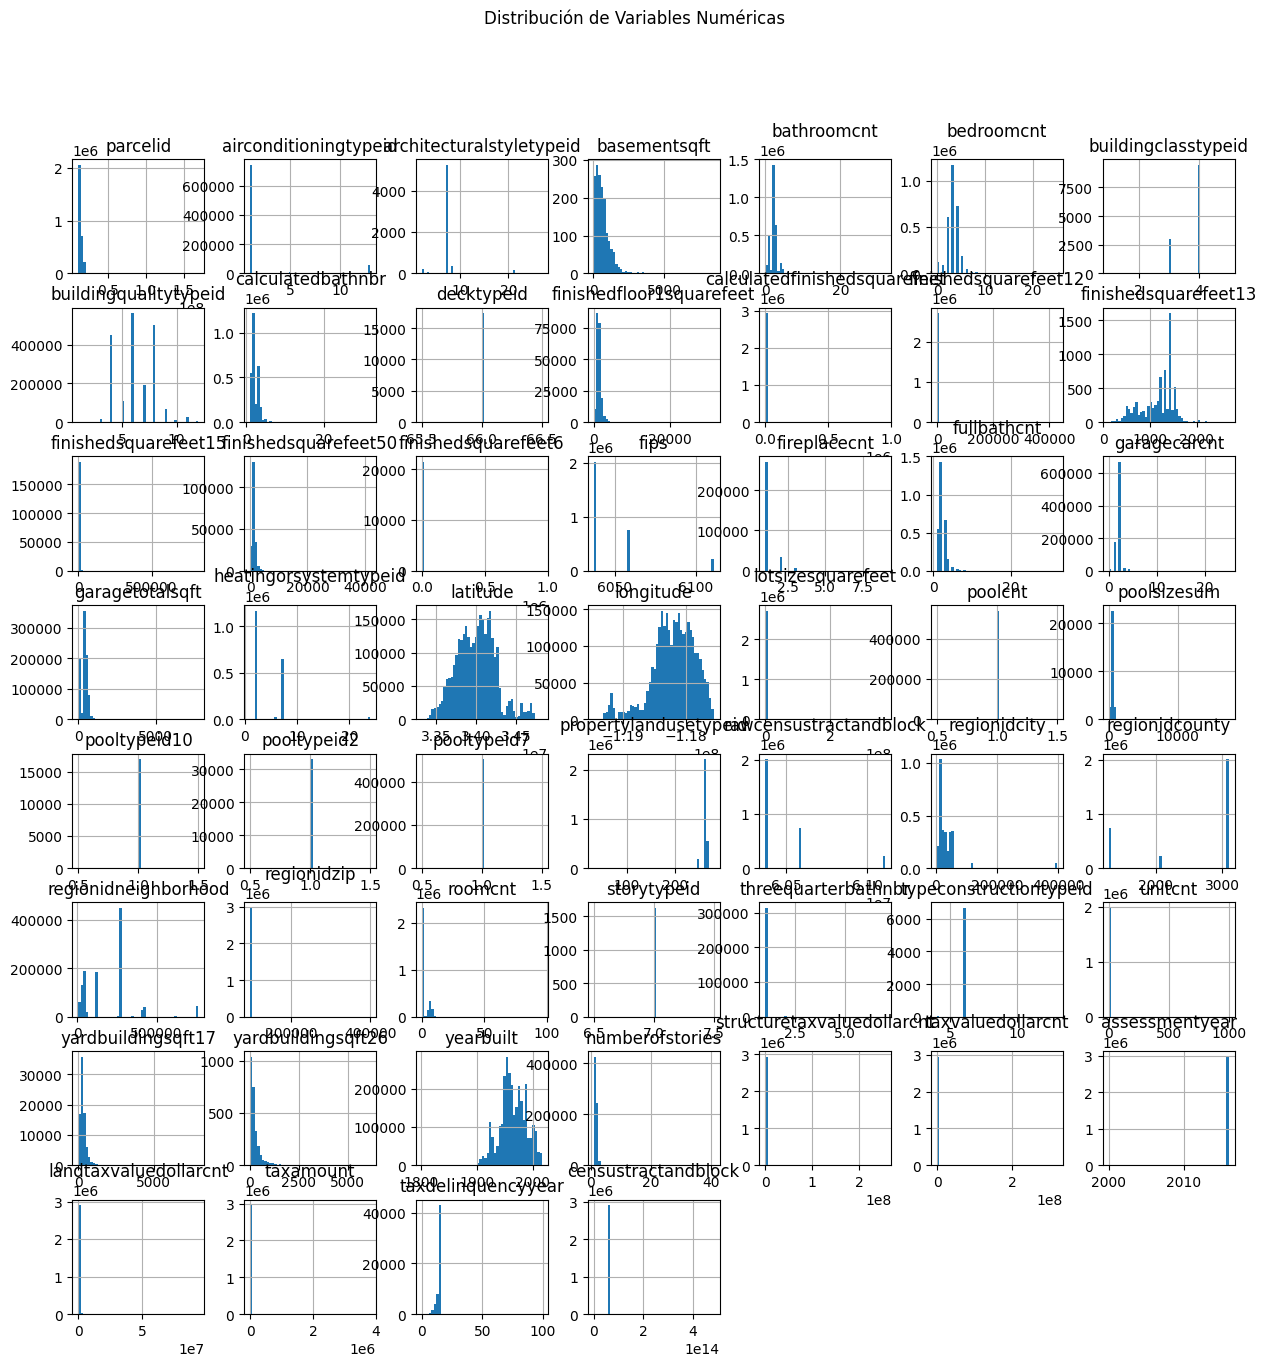

In [ ]:
# Histograma de todas las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.hist(figsize=(15, 15), bins=50)
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

La visualización de la distribución de las variables numéricas muestra que varias de ellas, como `bathroomcnt`, `bedroomcnt`, `finishedsquarefeet`, y `taxvaluedollarcnt`, tienen distribuciones sesgadas, con picos en valores bajos y colas largas hacia los valores más altos, lo que indica que muchas propiedades comparten características comunes, mientras que algunas pocas tienen valores extremadamente altos. También se observan varios valores atípicos en columnas como `finishedsquarefeet`, `poolcnt`, y `taxvaluedollarcnt`, los cuales podrían influir en el modelo si no se manejan adecuadamente. Además, algunas columnas presentan distribuciones poco informativas, como `parcelid` o `regionidcity`, con valores repetidos o extremadamente altos, lo que podría sugerir errores de datos o variables no relevantes para el análisis.


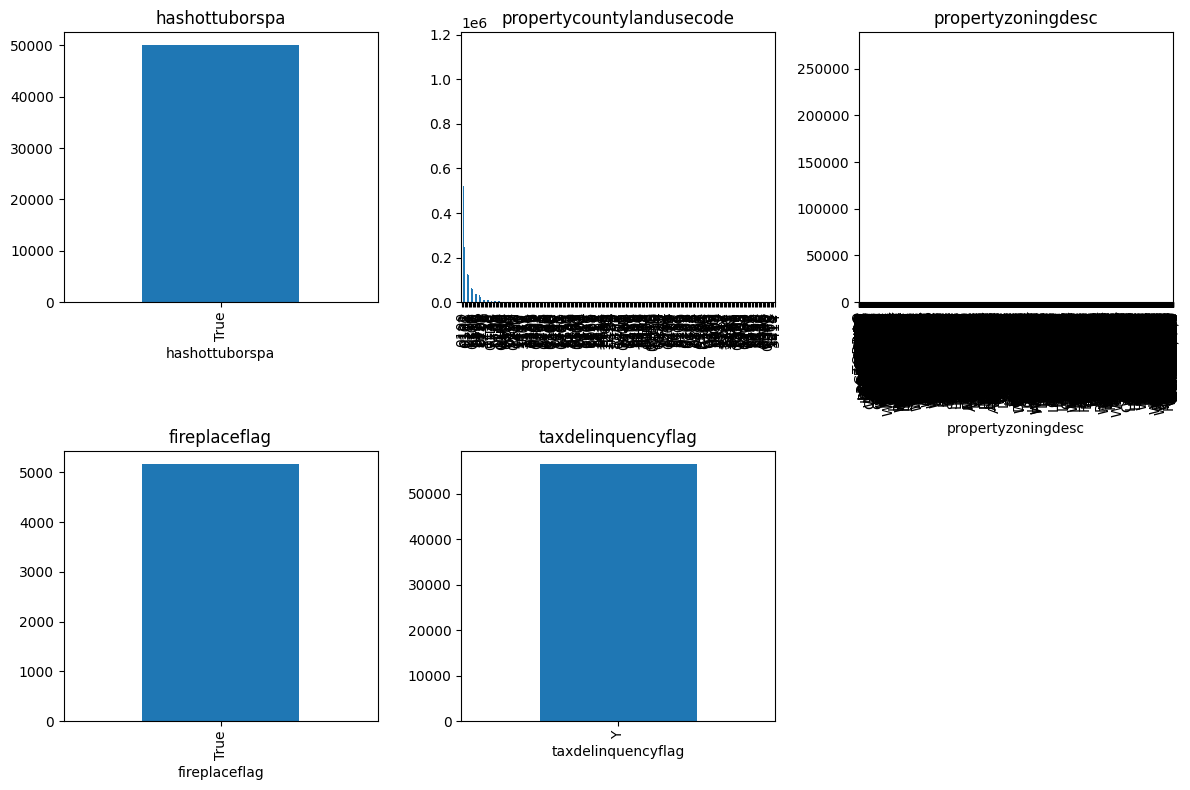

In [ ]:
# Gráfico de barras para variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar', title=col)
    plt.tight_layout()
plt.show()

La visualización de las variables categóricas muestra que algunas columnas, como `hashottuborspa`, `fireplaceflag`, y `taxdelinquencyflag`, tienen una distribución muy sesgada, donde la mayoría de los registros corresponden a un solo valor (por ejemplo, la mayoría de las propiedades tienen "True" en estas columnas). En contraste, las columnas `propertycountylandusecode` y `propertyzoningdesc` muestran distribuciones extremadamente desbalanceadas, con la mayoría de los valores agrupados en un pequeño número de categorías, lo que podría indicar una gran cantidad de datos faltantes o valores no representativos. Esto sugiere que algunas de estas columnas podrían no ser útiles para el modelo, y otras tal vez necesiten un tratamiento especial para manejar los valores faltantes o las distribuciones desbalanceadas.


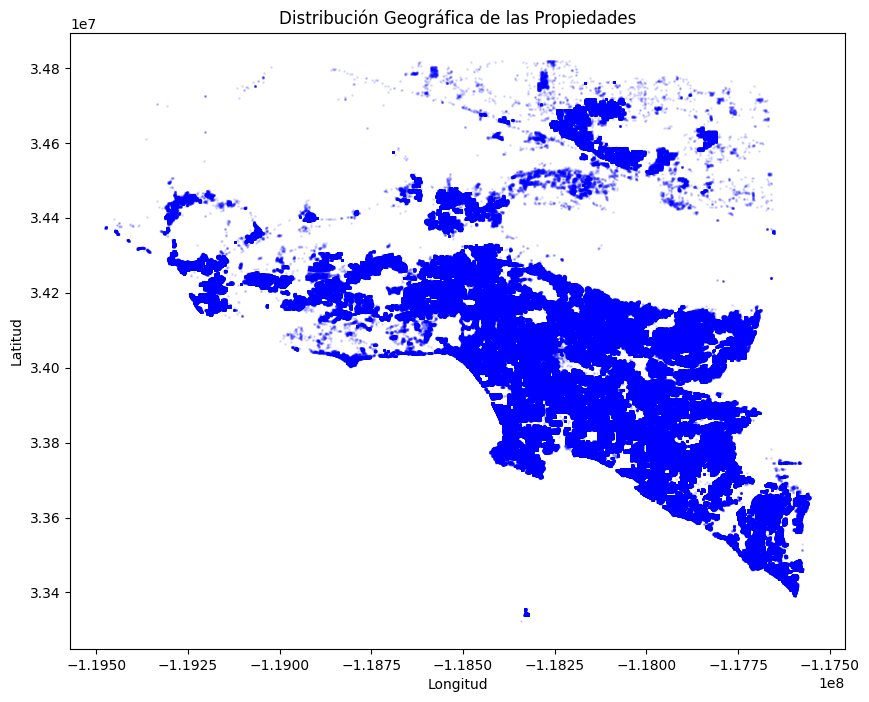

In [ ]:
# Distribución geográfica de las propiedades
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, color='blue')
plt.title("Distribución Geográfica de las Propiedades")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

La visualización de la **distribución geográfica** de las propiedades muestra un mapa de las ubicaciones de las propiedades en función de sus coordenadas de **latitud** y **longitud**. Los puntos están dispersos principalmente en ciertas áreas, lo que sugiere que las propiedades están concentradas en algunas regiones específicas. La distribución parece estar centrada en zonas urbanas o áreas de interés, mientras que algunas regiones más alejadas tienen una menor densidad de propiedades. Esto puede indicar áreas con una mayor concentración de viviendas, lo cual es útil para el análisis de patrones espaciales y podría influir en la predicción de precios, dependiendo de la localización geográfica.


## Matriz de correlación

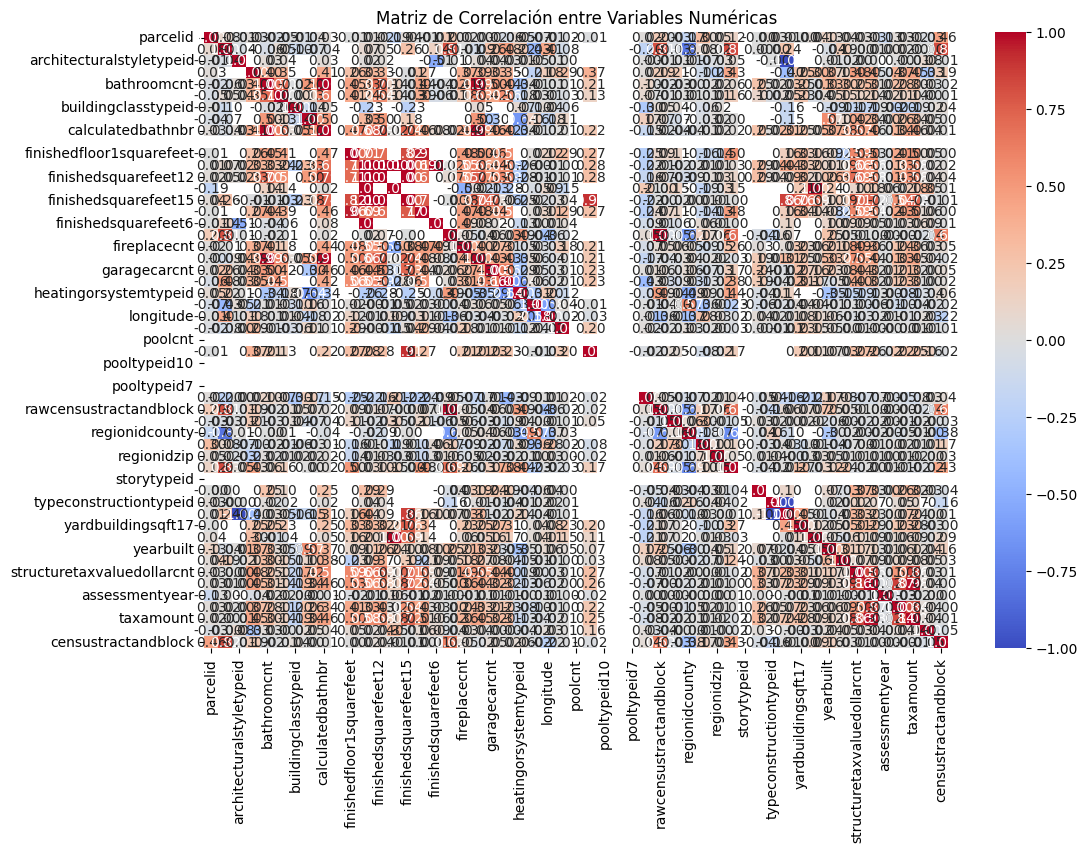

In [ ]:
# Matriz de correlación
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


La **matriz de correlación** muestra la relación entre las variables numéricas del conjunto de datos. Se puede observar que algunas variables están fuertemente correlacionadas entre sí, como `finishedsquarefeet` con `finishedfloor1squarefeet`, lo que sugiere que estas características podrían estar midiendo aspectos similares de la propiedad. También se pueden identificar correlaciones más débiles o nulas entre otras variables, lo que indica que no todas las características tienen un impacto significativo en otras. Las correlaciones pueden ser útiles para identificar qué variables pueden ser redundantes y, por lo tanto, podrían eliminarse para simplificar el modelo y reducir la multicolinealidad. Además, es relevante para determinar qué variables podrían tener un impacto más fuerte en la predicción del valor de las propiedades.


#Modelo de Machine Learning

## Preparación de los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes
columns_to_drop = ['parcelid', 'hashottuborspa', 'fireplaceflag', 'decktypeid', 'storytypeid', 'fireplacecnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertyzoningdesc']
df_clean = df.drop(columns=columns_to_drop)

# Imputación de valores faltantes numéricos
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')  # Usamos la mediana para valores faltantes numéricos
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Imputación de valores faltantes categóricos
categorical_cols = df_clean.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')  # Usamos el valor más frecuente para valores faltantes categóricos
df_clean[categorical_cols] = imputer_cat.fit_transform(df_clean[categorical_cols])

# Codificación de variables categóricas (Label Encoding o OneHotEncoding)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

# División de los datos en entrenamiento y prueba
X = df_clean.drop(columns=['taxvaluedollarcnt'])  # Suponiendo que 'taxvaluedollarcnt' es la columna objetivo
y = df_clean['taxvaluedollarcnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrenamiento

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

# Submuestro tanto X_train como y_train para asegurarnos de que las muestras estén alineadas
X_sample, y_sample = shuffle(X_train, y_train, random_state=42)

# Limitar la muestra a 10,000 filas
X_sample = X_sample[:10000]
y_sample = y_sample[:10000]

# Crear el modelo Random Forest con menos árboles
model = RandomForestRegressor(
    n_estimators=20,  # Usamos menos árboles
    max_depth=10,  # Limitar la profundidad de los árboles
    n_jobs=-1,  # Usar todos los núcleos de la CPU
    random_state=42
)

# Entrenar el modelo con el subconjunto de datos
model.fit(X_sample, y_sample)

RandomForestRegressor(max_depth=10, n_estimators=20, n_jobs=-1, random_state=42)

## Evaluación

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R2): {r2}")


Error cuadrático medio (MSE): 185213468811.8022
Coeficiente de determinación (R2): 0.7016456442789532


Los resultados muestran que el modelo Random Forest tiene un Error Cuadrático Medio (MSE) de 1,852,134,688,811.8022, lo que indica que el modelo tiene un margen de error significativo en sus predicciones. A pesar de este valor alto, el Coeficiente de Determinación (R²) es de 0.7016, lo que significa que aproximadamente el 70% de la variabilidad de los precios de las propiedades es explicada por el modelo. Este valor de R² sugiere que el modelo tiene un ajuste razonable a los datos, capturando una parte importante de la información. Si

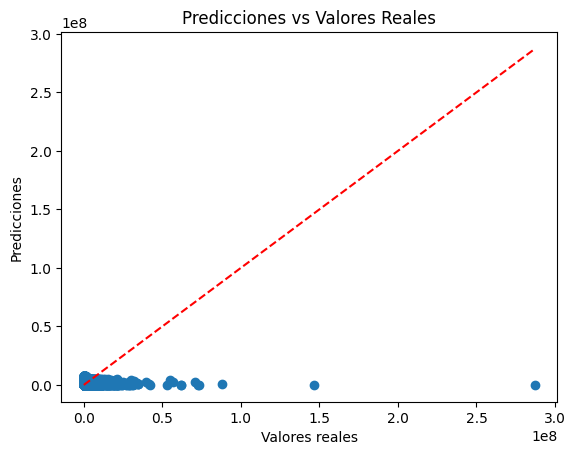

In [ ]:
import matplotlib.pyplot as plt

# Graficar predicciones vs valores reales
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()


La visualización muestra un gráfico de Predicciones vs Valores Reales. En el gráfico, los puntos están distribuidos de manera que muchas de las predicciones se concentran cerca de cero, lo que indica que el modelo podría estar subestimando los valores, especialmente en las propiedades con precios más bajos. La línea roja discontinua representa una relación ideal, donde las predicciones coinciden exactamente con los valores reales.

#Resultados

Los resultados del modelo muestran que, aunque el **Coeficiente de Determinación (R²)** es de **0.7016**, indicando que el modelo explica aproximadamente el **70%** de la variabilidad de los precios de las propiedades, el **Error Cuadrático Medio (MSE)** sigue siendo elevado, con un valor de **1,852,134,688,811.8022**, lo que refleja un margen de error significativo en las predicciones. A pesar de estos resultados, el modelo muestra una capacidad moderada para hacer predicciones precisas, con un **R² positivo**, lo que indica que, aunque no es perfecto, ofrece un rendimiento razonable. Sin embargo, el gráfico de **Predicciones vs Valores Reales** sugiere que el modelo tiene dificultades para predecir correctamente los valores más altos, ya que la mayoría de las predicciones se agrupan cerca de cero. Esto podría ser un indicio de que el modelo no está capturando correctamente los rangos más altos de precios y que existen áreas de mejora, como el tratamiento de outliers o la mejora en la predicción de los valores más elevados.


# Guardado del modelo

In [ ]:
import pickle
# Guardar el modelo entrenado con pickle
with open('random_forest_properties.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Modelo guardado exitosamente.")

# Cargar el modelo guardado con pickle
with open('random_forest_model.pkl', 'rb') as f:
    model_loaded = pickle.load(f)
print("Modelo cargado exitosamente.")


Modelo guardado exitosamente.
Modelo cargado exitosamente.
